<a href="https://colab.research.google.com/github/nedokormysh/GB_DA_algorithms/blob/lesson2/DA_algorithms_hw_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Задание 1.

Сгенерировать датасет при помощи sklearn.datasets.make_regression и обучить линейную модель при помощи градиентного и стохастического градиентного спуска. Нанести среднеквадратичную ошибку для обоих методов на один график, сделать выводы о разнице скорости сходимости каждого из методов.

In [ ]:
import numpy as np
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

%matplotlib inline

In [ ]:
# сгенерируем набор данных
data, target, coef = datasets.make_regression(n_samples=1000, n_features = 2, n_informative = 2, n_targets = 1, 
                                              noise = 5, coef = True, random_state = 2)
# print(data)
data[:,0] = data[:,0] * 10

In [ ]:
print(coef)

[62.6735955 68.0472182]


In [ ]:
# реализуем функцию, определяющую среднеквадратичную ошибку
def mserror(X, w, y_pred):
    y = X.dot(w)
    return (sum((y - y_pred)**2)) / len(y)

Отмасштабируем данные.

In [ ]:
scaler = StandardScaler()

data_scal = data.copy()
data_scal = scaler.fit_transform(data_scal)


## Градиентный спуск.

In [ ]:
def gradient_descent(X, y, eta=1e-3):
  """Алгоритм градиентного спуска, завершающий работу, когда веса перестанут изменяться. Альфа неизменна"""

  # начальный вектор весов
  n_features = 2
  w = np.zeros(n_features)


  # список векторов весов после каждой итерации 
  
  w[:] = 1
  w_list = [[0] + w.copy().tolist()]


  # список значений ошибок после каждой итерации
  errors = []

  # шаг градиентного спуска
  eta = 0.1

  # максимальное число итераций
  max_iter = 1e3

  # критерий сходимости (разница весов, при которой алгоритм останавливается)
  min_weight_dist = 1e-8

  # зададим начальную разницу весов большим числом
  weight_dist = np.inf

  # счетчик итераций
  iter_num = 0

  # ход градиентного спуска
  while (weight_dist > min_weight_dist) and (iter_num < max_iter):
    # новый вес w
    new_w = w - 2 * eta * np.dot(X.T, (np.dot(X, w) - y)) / y.shape[0]

    # оценка расстояния по эвклиду между старым и новым состоянием w
    weight_dist = np.linalg.norm(new_w - w, ord=2)
    
    w_list.append([iter_num]+new_w.copy().tolist())
    errors.append(mserror(X, new_w, y))
    
    iter_num += 1
    w = new_w
    
  w_list = np.array(w_list)
  # print('w_list', w_list)

  print(f'В случае использования градиентного спуска функционал ошибки составляет {round(errors[-1], 4)}')

  return w_list, errors

В случае использования градиентного спуска функционал ошибки составляет 38.5683
w = [99.         61.43607082 67.66544975]


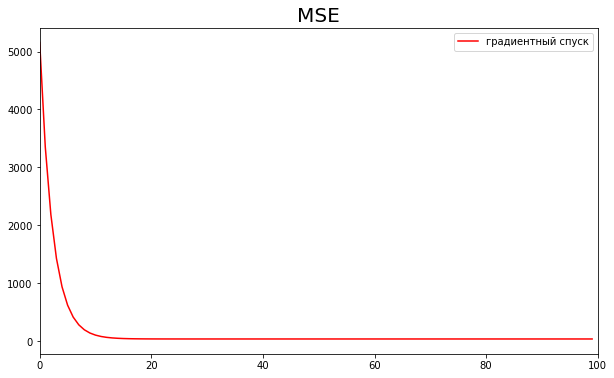

In [ ]:
w_gd, errors_gd = gradient_descent(data_scal, target)

plt.figure(figsize = (10, 6))

plt.plot(range(len(errors_gd)), errors_gd, c='r', label='градиентный спуск')

plt.xlim(0, 100)
plt.title('MSE', size=20)
plt.legend(loc='best')
plt.xlabel('iterations')
plt.ylabel('MSE')

print('w =', w_gd[-1])

## Стохастический градиентный спуск.

In [ ]:
def stohastic_gradient_descent(X, y, eta=1e-3):
  """Алгоритм стохастического градиентного спуска, завершающий работу, когда веса перестанут изменяться. Альфа неизменна"""

  # начальный вектор весов
  n_features = 2
  w = np.zeros(n_features)

  # список векторов весов после каждой итерации 
  
  w[:] = 1
  # w_list = [[0] + w.copy().tolist()]
  w_list = [w.copy()]


  # список значений ошибок после каждой итерации
  errors = []

  # шаг градиентного спуска
  eta = 0.1

  # максимальное число итераций
  max_iter = 1e5

  # критерий сходимости (разница весов, при которой алгоритм останавливается)
  min_weight_dist = 1e-8

  # зададим начальную разницу весов большим числом
  weight_dist = np.inf

  # счетчик итераций
  iter_num = 0
  lamb = 0.01 
  np.random.seed(1234)

  Q = [mserror(X, w, y)] 

  # ход градиентного спуска
  while (weight_dist > min_weight_dist) and (iter_num < max_iter):

    # генерируем случайный индекс объекта выборки
    train_ind = np.random.randint(X.shape[0])

    # новый вес w
    new_w = w - 2 * eta * np.dot(X[train_ind].T, (np.dot(X[train_ind], w) - y[train_ind])) / y.shape[0]
    # new_w = w - 2 * eta /(0+1) * np.dot(X[train_ind].T, (np.dot(X[train_ind], w) - y[train_ind])) / y.shape[0]
 
    # оценка расстояния по эвклиду между старым и новым состоянием w
    weight_dist = np.linalg.norm(new_w - w, ord=2)
  
    
    # w_list.append([iter_num] + new_w.copy().tolist())
    w_list.append(new_w.copy())
    errors.append(mserror(X, new_w, y))    
    
    Q.append(Q[-1] * (1 - lamb) + lamb * (np.dot(X[train_ind], w) - y[train_ind])**2)
    iter_num += 1
    w = new_w
    
  w_list = np.array(w_list)
  # print('w_list', w_list)

  print(f'В случае использования стохастического градиентного спуска функционал ошибки составляет {round(errors[-1], 4)}')

  return w_list, errors, Q

В случае использования стохастического градиентного спуска функционал ошибки составляет 38.5728
w = [61.37315105 67.64052769]


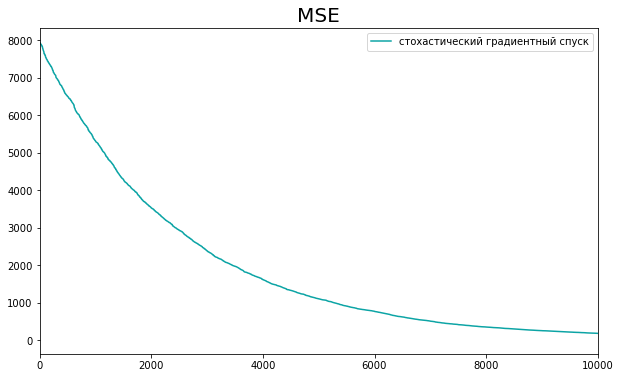

In [ ]:
w_sgd, errors_sgd, Q_sqd = stohastic_gradient_descent(data_scal, target)

plt.figure(figsize = (10, 6))

plt.plot(range(len(errors_sgd)), errors_sgd, c='#0CA4A5', label='стохастический градиентный спуск')
plt.xlim(0, 10000)
plt.title('MSE', size=20)
plt.legend(loc='best')
plt.xlabel('iterations')
plt.ylabel('MSE')

print('w =', w_sgd[-1])

Как и ожидалось скорость сходимости градиентного спуска выше, чем стохастического градиентного.

# Задание 2.


Модифицировать решение первого задания путем добавления $L_{2}$-регуляризации (в функцию, считающую MSE добавить норму весов, а в поправку нужно добавить производную для нормы вектора весов по весам) и сравнить результаты.

## Gradient

In [ ]:
def gradient_descent_L2(X, y, eta=1e-3, q=30/100):

  w = np.random.randn(X.shape[1])
  w_list = [w.copy()]
  errors = []
  max_iter = 1e3
  min_weight_dist = 1e-8

  
  weight_dist = np.inf

  iter_num = 0  

  while (weight_dist > min_weight_dist) and (iter_num < max_iter):
  
    new_w = w - 2 * eta * (np.dot(X.T, (np.dot(X, w) - y))) / y.shape[0] - (2 * q * w)
    
    weight_dist = np.linalg.norm(new_w - w, ord=2)

    w_list.append(new_w.copy())
    errors.append(mserror(X, new_w, y))
    
    iter_num += 1
    w = new_w
    
  w_list = np.array(w_list)

  print(f'В случае использования градиентного спуска c L2 регуляризацией функционал ошибки составляет {round(errors[-1], 4)}')

  return w_list, errors

В случае использования градиентного спуска c L2 регуляризацией функционал ошибки составляет 39.4069
w =  [60.81141054 66.98055324]


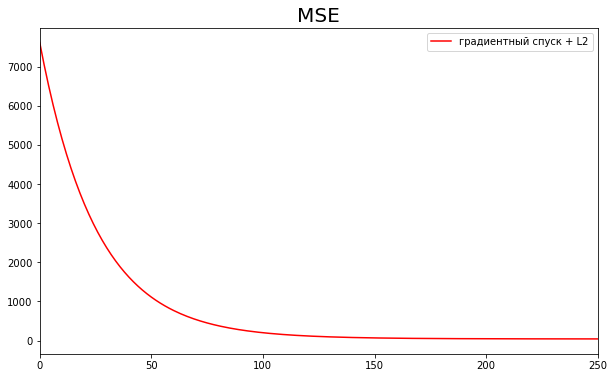

In [ ]:
w_dg_L2, errors_gd_L2 = gradient_descent_L2(data_scal, target, eta=0.01, q=1e-4)

plt.figure(figsize = (10, 6))

plt.plot(range(len(errors_gd_L2)), errors_gd_L2, c='r', label='градиентный спуск + L2')
plt.xlim(0, 250)
plt.title('MSE', size=20)
plt.legend(loc='best')
plt.xlabel('iterations')
plt.ylabel('MSE')

print('w = ', w_dg_L2[-1])

## Stohastic gradient

In [ ]:
def stohastic_gradient_descent_L2(X, y, eta=1e-3, q=30/100, lamb=0.01):
  
  w = np.random.randn(data_scal.shape[1])

  w_list = [w.copy().T] 
  errors = []
   
  max_iter = 1e2
 
  min_weight_dist = 1e-8
 
  weight_dist = np.inf
 
  iter_num = 0
#   lamb = 0.01 
  
  np.random.seed(1234)

  Q = [mserror(X, w, y)]

  while weight_dist > min_weight_dist and iter_num < max_iter:
    
    
    train_ind = np.random.randint(X.shape[0])
    
    dQ = np.dot(X[train_ind].T, (np.dot(X[train_ind], w) - y[train_ind]))
    dL2 = 2 * w
    
    new_w = w - 2 * eta * dQ / y.shape[0] - q * dL2
     
    weight_dist = np.linalg.norm(new_w - w, ord=2)

    w_list.append(new_w.copy())
    errors.append(mserror(X, new_w, y))

    
    Q.append(Q[-1] * (1 - lamb) + lamb * (np.dot(X[train_ind], w) - y[train_ind])**2)
    
    iter_num += 1
    w = new_w
    
  w_list = np.array(w_list)
 
  print(f'В случае использования стохастического градиентного спуска с использованием регуляризации функционал ошибки составляет {round(errors[-1], 4)}')


  return w_list, errors, Q

В случае использования стохастического градиентного спуска с использованием регуляризации функционал ошибки составляет 40.1501
w =  [62.51045201 68.3458325 ]


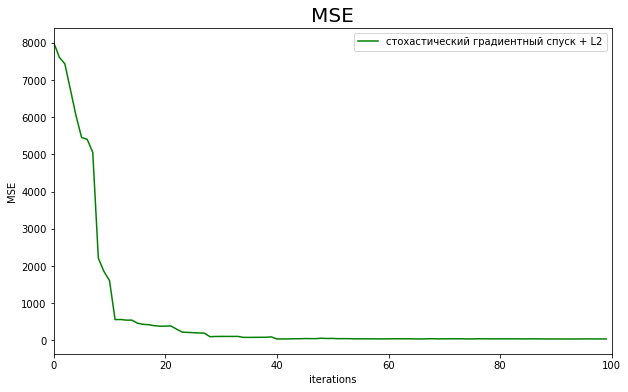

In [ ]:
w_sgd_L2, errors_sgd_L2, Q_sqd_L2 = stohastic_gradient_descent_L2(data_scal, target, eta=50, q=1e-4)

plt.figure(figsize = (10, 6))
plt.plot(range(len(errors_sgd_L2)), errors_sgd_L2, c='g', label='стохастический градиентный спуск + L2')
plt.xlim(0, 100)
plt.title('MSE', size=20)
plt.legend(loc='best')
plt.xlabel('iterations')
plt.ylabel('MSE')

print('w = ', w_sgd_L2[-1])

Возможно что-то сделано не так. Но сходимость стохастического градиентного спуска ухудшилась. Фактически только большие значения шага приводили к удовлетворительным результатам.

In [ ]:
# eta_bf = [50, 0.1, 0.01, 0.001, 0.0001, 0.00001, 0.000001]
# q_bf = [50, 0.1, 0.01, 0.001, 0.0001, 0.00001, 0.000001]
# lamb_bf = [50, 0.1, 0.01, 0.001, 0.0001, 0.00001, 0.000001]


# for i in eta_bf:
#     for k in q_bf:
#         for l in lamb_bf:
#             print(f'eta = {i}, q = {k}, lamb = {l}')
#             w_sgd_L2, errors_sgd_L2, Q_sqd_L2 = stohastic_gradient_descent_L2(data_scal, target, eta=i, q=k)
#             print('w = ', w_sgd_L2[-1])
    